<a href="https://colab.research.google.com/github/nandiniii2404/CLUSTERING/blob/main/clustering_assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo


In [2]:
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
breast_cancer = fetch_ucirepo(id=17)

# Extract features (X) and labels (y) as DataFrames
X = breast_cancer.data.features
y = breast_cancer.data.targets  # We won't use this for clustering

# Print metadata (optional)
print(breast_cancer.metadata)

# Print variable info (optional)
print(breast_cancer.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)


In [5]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate(X, labels, name):
    print(f"--- {name} ---")
    print("Silhouette Score:", silhouette_score(X, labels))
    print("Davies-Bouldin Index:", davies_bouldin_score(X, labels))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(X, labels))

evaluate(X_scaled, labels_kmeans, "KMeans")
evaluate(X_scaled, labels_agg, "Agglomerative")
evaluate(X_scaled, labels_dbscan, "DBSCAN")


--- KMeans ---
Silhouette Score: 0.3447344346611054
Davies-Bouldin Index: 1.3092887340398867
Calinski-Harabasz Index: 267.6804357184897
--- Agglomerative ---
Silhouette Score: 0.33938477753669855
Davies-Bouldin Index: 1.3699635418941032
Calinski-Harabasz Index: 248.62884061078898
--- DBSCAN ---
Silhouette Score: -0.19851389887763776
Davies-Bouldin Index: 2.2305638233571967
Calinski-Harabasz Index: 22.255329564827814


In [8]:

# 📊 Save Clustering Labels to CSV
import pandas as pd

df = X.copy()  # Original features
df['KMeans_Cluster'] = labels_kmeans
df['Agglomerative_Cluster'] = labels_agg
df['DBSCAN_Cluster'] = labels_dbscan

df.to_csv("clustering_results.csv", index=False)
print("✅ clustering_results.csv saved!")


✅ clustering_results.csv saved!


In [9]:
# Save Evaluation Metrics to CSV

metrics_df = pd.DataFrame({
    'Method': ['KMeans', 'Agglomerative', 'DBSCAN'],
    'Silhouette': [
        silhouette_score(X_scaled, labels_kmeans),
        silhouette_score(X_scaled, labels_agg),
        silhouette_score(X_scaled, labels_dbscan)
    ],
    'Davies-Bouldin': [
        davies_bouldin_score(X_scaled, labels_kmeans),
        davies_bouldin_score(X_scaled, labels_agg),
        davies_bouldin_score(X_scaled, labels_dbscan)
    ],
    'Calinski-Harabasz': [
        calinski_harabasz_score(X_scaled, labels_kmeans),
        calinski_harabasz_score(X_scaled, labels_agg),
        calinski_harabasz_score(X_scaled, labels_dbscan)
    ]
})

metrics_df.to_csv("clustering_metrics.csv", index=False)
print("✅ clustering_metrics.csv saved!")


✅ clustering_metrics.csv saved!


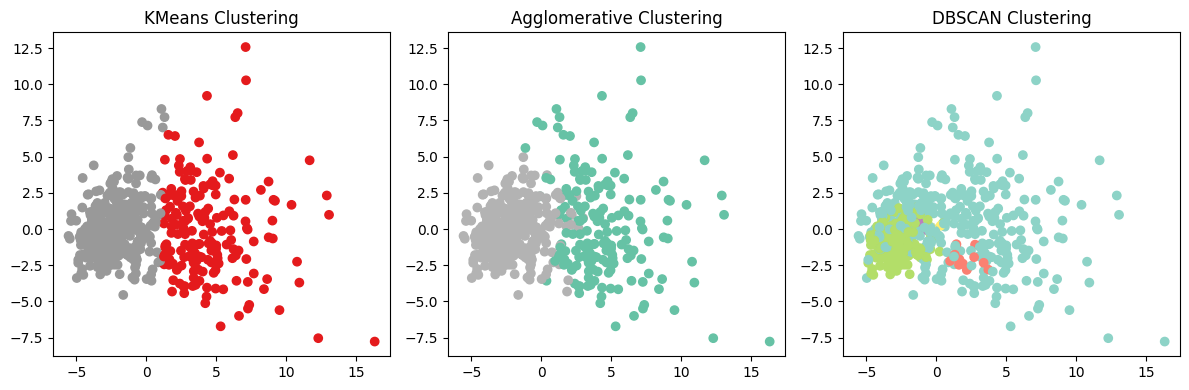

In [10]:
# Visualize Using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 4))

# KMeans
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='Set1')
plt.title("KMeans Clustering")

# Agglomerative
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agg, cmap='Set2')
plt.title("Agglomerative Clustering")

# DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='Set3')
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()
